# 04 - Overlap Management (Tomek Links)

In [14]:
# import libraries
import pandas as pd
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [15]:
# upload data
df = pd.read_csv("bank_numeric.csv")

# Separate features (X) and target (y)
X = df.drop(columns=['deposit'])
y = df['deposit']

# check original class distribution
print("Original class distribution:", dict(zip(*pd.Series(y).value_counts().items())))

Original class distribution: {0: 1, 3144: 2113}


In [16]:
# apply Tomek Links
tomek = TomekLinks()
X_resampled, y_resampled = tomek.fit_resample(X, y)

In [17]:
# check resampled class distribution
print("Resampled class distribution:", dict(zip(*pd.Series(y_resampled).value_counts().items())))

# it is not equal that it was in many other situations before
# i think this way of distribution looks more realistic

Resampled class distribution: {0: 1, 2758: 2113}


In [18]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# train a Logistic Regression model
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)


C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=42)

In [19]:
predictions = logreg.predict(X_test)

# print the classification report based on true values and predictions
print(classification_report(y_test, predictions))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       809
           1       0.85      0.76      0.81       653

    accuracy                           0.84      1462
   macro avg       0.84      0.83      0.83      1462
weighted avg       0.84      0.84      0.83      1462


Model overall accuracy: 83.58%


In [20]:
# True Negative (TN) - False Positive (FP)
# False Negative (FN) - True Positive (TP)
print(confusion_matrix(y_test, predictions))


[[724  85]
 [155 498]]


In [ ]:
roc_auc_score(y, logreg.predict_proba(X.values)[:, 1])

C:\Users\e1003118\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


0.902669798858153

In [22]:
# wow, results are amazing compared to the metrics
# which were measured before distribution

previous results
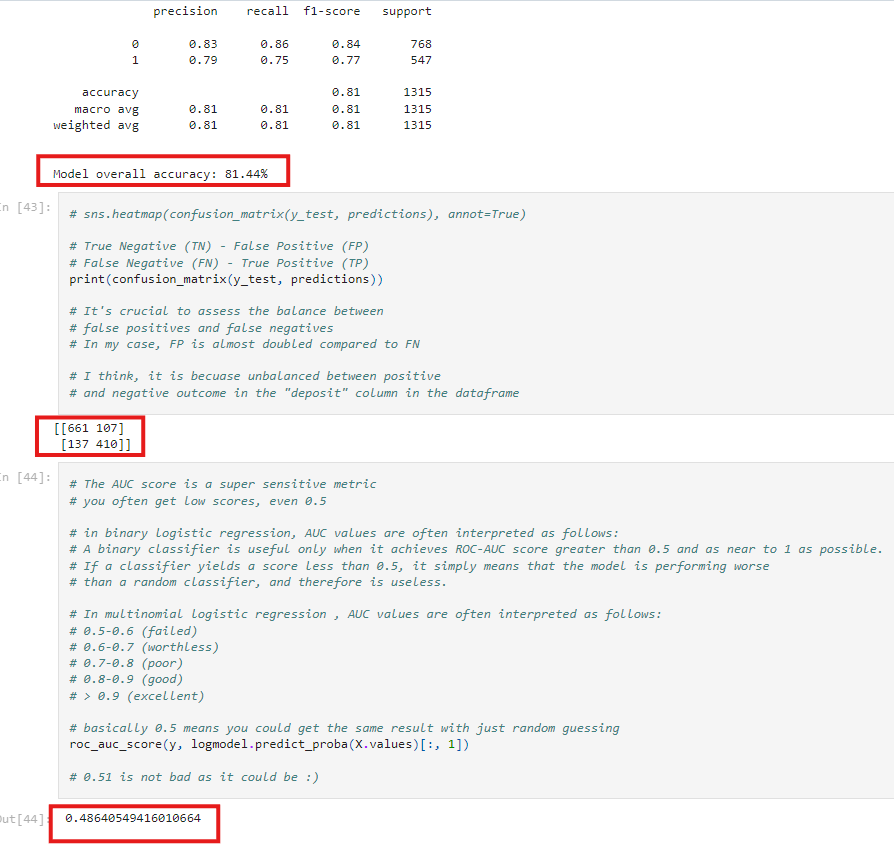